<center> <h1> 600092 <br>  Data Mining and Decision Systems </h1> </center>

---

<center> <h2> Data Cleaning </h2> </center>

#### Importing necessary libraries.

In [107]:
import pandas as pd
import seaborn as sns
import numpy as np

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.model_selection import KFold

from IPython.display import Image  

import pydotplus

import matplotlib.pyplot as plt
import scikitplot as skpl

%matplotlib inline

#### Importing dataset and creating a copy of the dataset.

In [2]:
non_standard_vals = ["na", "n/a", "--", " "]
df = pd.read_csv('600092_data.csv', na_values=non_standard_vals)

df_copy = df.copy()

Also here, using non_standard_vals, this checks if there's any non-standard null values such as `na, n/a, --, " "` in the dataset, then in the import, those values are replaced with correct standard null values.

 #### Making sure the data has been correctly imported

In [3]:
df_copy.head() # Grabs the first 5 entities

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk


Looks like the data has imported correctly, now data cleaning can begin.

#### Understanding the dataset


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
Random          1520 non-null float64
Id              1520 non-null int64
Indication      1517 non-null object
Diabetes        1518 non-null object
IHD             1520 non-null object
Hypertension    1517 non-null object
Arrhythmia      1520 non-null object
History         1518 non-null object
IPSI            1516 non-null float64
Contra          1519 non-null float64
label           1517 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 89.1+ KB


Using `df_copy.info()` to briefly summarise the dataset, to better understand the data.

This shows how many data entities there are, and the different data types.

In [5]:
df_copy.mean()

Random         0.509545
Id        188365.022368
IPSI          78.872032
Contra        56.828176
dtype: float64

Taking the mean from all the numerical values could help later with replacing the nulls in those columns. Same with describe below. Unfortuely they only show a portion of the data as the rest are `str` values

In [6]:
df_copy.describe()

,Random,Id,IPSI,Contra
count,1520.000000,1520.000000,1516.000000,1519.000000
mean,0.509545,188365.022368,78.872032,56.828176
std,0.284006,64355.870242,10.162351,29.535671
min,0.000295,78261.000000,35.000000,10.000000
25%,0.268531,137130.750000,73.000000,30.000000
50%,0.517616,191344.500000,77.000000,50.000000
75%,0.754724,244559.500000,85.000000,85.000000
max,0.999448,295978.000000,99.000000,100.000000


#### Checking for null values

This is just a check whether there is any null values 

In [7]:
df_copy.isnull().values.any() 

True

This returns a boolean value, and as shown, it is `true` there is null values


**Where are the null values?**

In [8]:
df_copy.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          1
label           3
dtype: int64

This shows the amount of null values each column has, therefore as decision could be made to either fill the values in or drop them entirely. 

As shown there is 18 NaN values.

#### Percentage of Null values 

In [9]:
null_val_percent = df_copy.isnull().sum()/len(df_copy)*100

null_val_percent

Random          0.000000
Id              0.000000
Indication      0.197368
Diabetes        0.131579
IHD             0.000000
Hypertension    0.197368
Arrhythmia      0.000000
History         0.131579
IPSI            0.263158
Contra          0.065789
label           0.197368
dtype: float64

As seen there is very similar percentage of null values distributed within the data set 

#### Context to null values

#### Visualisation of Null value placements

In [10]:
display_nulls = df_copy[df_copy.isna().any(axis=1)]

display_nulls

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90.0,Risk
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50.0,NoRisk
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40.0,NoRisk
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100.0,Risk
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,NaN,NoRisk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40.0,NoRisk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30.0,NoRisk
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100.0,Risk
752,0.243518,146415,CVA,no,yes,yes,yes,no,NaN,100.0,Risk
784,0.243645,196483,CVA,no,no,yes,yes,NaN,95.0,100.0,Risk


##### Heat map of null distribution throughout data 

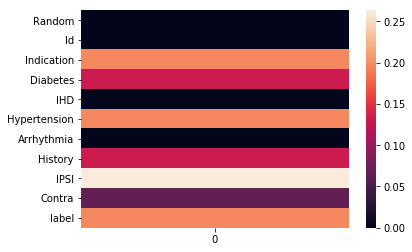

In [11]:
sns.heatmap(null_val_percent.to_frame())

##### Pie chart of null values in percentages

Here the heat map shows a distribution of null values in the columns

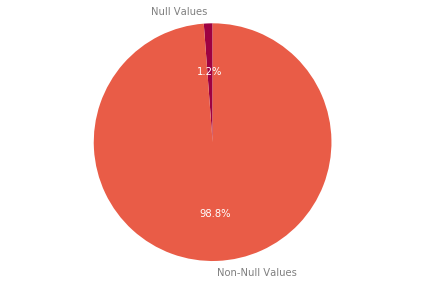

In [12]:
amount_of_nulls = df_copy.isnull().values.sum()
amount_of_non_nulls = len(df_copy) - amount_of_nulls

labels = 'Null Values', 'Non-Null Values'
sizes = [amount_of_nulls, amount_of_non_nulls]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

Only 1.2% of the data is null values as the pie chart shows. 

This shows all the null values within the data, this makes it useful to give context where the null values are relation to the data. 

**Now a decision can be made either to drop the values or fill them in.**

As there is only 18 data entities that contain `NaN` values which makes up 1.2% of data set, filling in the data values with either a `fillna(ffill)` or `fillna(bfill` may skew any visualisation of the results or any models that will be made in the future, possibly incorrectly training the models. 

Along with this, the context of the data is whether a patient is at risk or not of death regarding all the possible health issues they may or may not have, which either a forward fill or backwards fill could incorrectly label them which would could cause issues later down the line, especially with training a model. 

Therefore, it will be better practise to drop the `NaN` values.

In [13]:
df_copy.dropna(inplace=True)

**Checking if `NaN` values have been dropped**

In [14]:
df_copy.isnull().sum()

Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

As we can see all the `NaN` values have been dropped, and progress can be made. 

#### Column Naming

The column names such as label aren't very descriptive of the data the column contains, so it would be adviable to rename that column to something like `mortatliy`

In [15]:
df_copy.rename(columns={'label': 'Mortality'}, inplace = True)

In [16]:
df_copy["Mortality"]

0       NoRisk
1       NoRisk
2         Risk
3         Risk
4       NoRisk
         ...  
1515    NoRisk
1516      Risk
1517    NoRisk
1518    NoRisk
1519    NoRisk
Name: Mortality, Length: 1502, dtype: object

This column name now gives a somewhat accurate description of what is in the column.

#### Correcting Data types

According to the briefing, not all these data types are correct. Such as `Contra` and `IPSI`, which must be converted into integers respectively.

First, its best to check the data types:

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1519
Data columns (total 11 columns):
Random          1502 non-null float64
Id              1502 non-null int64
Indication      1502 non-null object
Diabetes        1502 non-null object
IHD             1502 non-null object
Hypertension    1502 non-null object
Arrhythmia      1502 non-null object
History         1502 non-null object
IPSI            1502 non-null float64
Contra          1502 non-null float64
Mortality       1502 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 99.7+ KB


It's not necessary for `IPSI` and `Contra` to be `Float64`, they are much better suited to be `Int64` instead.

In [18]:
df_copy["IPSI"] = df_copy["IPSI"].astype(np.int64)

In [19]:
df_copy["Contra"] = df_copy["Contra"].astype(np.int64)

Now to check if the conversion worked.

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1519
Data columns (total 11 columns):
Random          1502 non-null float64
Id              1502 non-null int64
Indication      1502 non-null object
Diabetes        1502 non-null object
IHD             1502 non-null object
Hypertension    1502 non-null object
Arrhythmia      1502 non-null object
History         1502 non-null object
IPSI            1502 non-null int64
Contra          1502 non-null int64
Mortality       1502 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 99.7+ KB


As shown the conversion worked.

#### Checking for incorrect values

It's necessary to check whether there is valid data in the dataset, spelling mistakes, unknow values or incorrect datatypes can cause issues with further data manipulation.

**Checking columns for incorrect values**

In [21]:
for c in df_copy.columns: 
        print(df_copy[c].name)
        print(df_copy[c].value_counts(), ("\n"))

Random
0.683506    4
0.506597    4
0.576184    4
0.899742    4
0.803415    3
           ..
0.801775    1
0.972183    1
0.692722    1
0.675468    1
0.219026    1
Name: Random, Length: 1211, dtype: int64 

Id
280575    1
260803    1
174778    1
170683    1
141608    1
         ..
157020    1
259831    1
163168    1
215064    1
221184    1
Name: Id, Length: 1502, dtype: int64 

Indication
A-F    489
CVA    408
TIA    388
ASx    185
Asx     32
Name: Indication, dtype: int64 

Diabetes
no     1427
yes      75
Name: Diabetes, dtype: int64 

IHD
no     790
yes    712
Name: IHD, dtype: int64 

Hypertension
no     777
yes    725
Name: Hypertension, dtype: int64 

Arrhythmia
no     1178
yes     324
Name: Arrhythmia, dtype: int64 

History
no     1480
yes      22
Name: History, dtype: int64 

IPSI
70    229
75    221
80    185
90    173
95    155
73     83
85     76
76     74
78     49
68     32
99     30
60     29
81     28
82     25
50     23
65     14
79     13
71     13
55      9
77      9
74

As seen above, in the column `Indication` there is a possible spelling mistake, as there's `Asx` with 32 values, instead of `ASx` which has 185 values. As `ASx` has a high amount of values, its safe to presume that `Asx` is a miss-spelling and should be rectified. 


Also, in the column `label`, there is 2 `unknown` values. Which should be viewed and then either fixed or dropped.

In [22]:
df_copy["Indication"] = df_copy["Indication"].replace({'Asx':'ASx'})

This replaces the miss-spelling with the correct spelling.

Then to check if this has worked

In [23]:
df_copy["Indication"].value_counts()

A-F    489
CVA    408
TIA    388
ASx    217
Name: Indication, dtype: int64

Which is has, now the incorrect spelling has been rectifed.

**Moving onto the unknown values in `label`** 

In [24]:
df_copy.loc[df_copy["Mortality"] == "Unknown"]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality
475,0.298074,173791,ASx,no,yes,yes,no,no,70,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95,100,Unknown


This shows that `Unknown` is a string value, therefore can just be dropped, as it provides incorrect data. 

In [25]:
unknown_index = df_copy[df_copy["Mortality"] == "Unknown" ].index

df_copy.drop(unknown_index , inplace=True)

Now to check this

In [26]:
df_copy["Mortality"].value_counts()

NoRisk    1000
Risk       500
Name: Mortality, dtype: int64

As seen, there is no `Unknown` value any more

#### Looking for duplicate values

It's nescessary to find incorrect duplicate values, the only column that shouldn't have duplicated values is `Random`, we can also check if `Id` contains duplicates as the column allows them.

In [27]:
df_copy["Random"].duplicated().any()

True

So there is duplicated values in `Random`

In [28]:
df_copy["Id"].duplicated().values.any()

False

And there are no duplicates in `Id`, this suggests that there was a error in naming the columns, or just incorrect data input. 

#### Visualising duplicates in `Random` column

Amount of duplicate values:  289
Amount of unique values:  1211


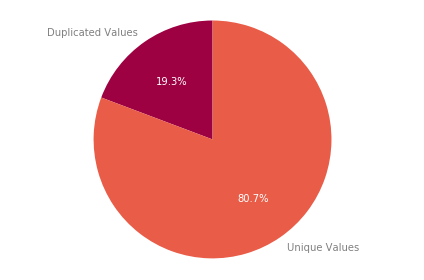

In [29]:
amount_of_duplicates = df_copy["Random"].duplicated().sum()
print("Amount of duplicate values: ", amount_of_duplicates)

amount_of_unique = len(df_copy) - amount_of_duplicates
print("Amount of unique values: ", amount_of_unique)

labels = 'Duplicated Values', 'Unique Values'
sizes = [amount_of_duplicates, amount_of_unique]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

Here we can see the distribution of duplicates in the `Random` column

This shows a quite substaination amount of duplicates. There are two options, either just drop the column or drop the duplicate rows. 

As there could be model training with this dataset it makes more sense just to drop the column.

In [30]:
df_copy.drop("Random", axis=1, inplace = True)

Now to check if the drop has worked.

In [31]:
df_copy.head()

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality
0,218242,A-F,no,no,yes,no,no,78,20,NoRisk
1,159284,TIA,no,no,no,no,no,70,60,NoRisk
2,106066,A-F,no,yes,yes,no,no,95,40,Risk
3,229592,TIA,no,no,yes,no,no,90,85,Risk
4,245829,CVA,no,no,no,no,no,70,20,NoRisk


As seen, it has worked fine.

#### Unnecessary columns

Some of the columns are unnecessary for data analysis. One of these columns is `Id`, as it is unnecessary for an identifier for data analysis. 

The other identifier `Random` has already been dropped, so the only other identifer is `Id` as its not necessary, it can be dropped also. 

In [32]:
df_copy.drop("Id", axis=1, inplace = True)

Now to check if the drop has worked

In [33]:
df_copy.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality
0,A-F,no,no,yes,no,no,78,20,NoRisk
1,TIA,no,no,no,no,no,70,60,NoRisk
2,A-F,no,yes,yes,no,no,95,40,Risk
3,TIA,no,no,yes,no,no,90,85,Risk
4,CVA,no,no,no,no,no,70,20,NoRisk


Which it has.

#### Mapping Columns to Integer Values

In [34]:
df_copy["Indication"] = df_copy["Indication"].map({"A-F": "0", "TIA":"1", "CVA": "2", "ASx": "3"})

df_copy["Diabetes"] = df_copy["Diabetes"].map({"no":"0", "yes":"1"})

df_copy["IHD"] = df_copy["IHD"].map({"no":"0", "yes":"1"})

df_copy["Hypertension"] = df_copy["Hypertension"].map({"no":"0", "yes":"1"})

df_copy["Arrhythmia"] = df_copy["Arrhythmia"].map({"no":"0", "yes":"1"})

df_copy["History"] = df_copy["History"].map({"no":"0", "yes":"1"})

df_copy["Mortality"] = df_copy["Mortality"].map({"NoRisk":"0", "Risk":"1"})

So this replaces, or in this case maps the yes or no (and risk, no risk) to integer values. This quanifies the number of states the columns contain, such as yes or no, or risk, norisk ect. 

Also it allows the data to be visualised and modelled. For example `.corr()` only allows for numerical values, non-numerical values are ignored. Same with modeling. 

In [35]:
df_copy

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality
0,0,0,0,1,0,0,78,20,0
1,1,0,0,0,0,0,70,60,0
2,0,0,1,1,0,0,95,40,1
3,1,0,0,1,0,0,90,85,1
4,2,0,0,0,0,0,70,20,0
...,...,...,...,...,...,...,...,...,...
1515,0,0,1,0,0,0,76,60,0
1516,0,0,0,1,1,0,90,75,1
1517,1,0,0,1,0,0,75,20,0
1518,0,0,1,0,0,0,70,45,0


In [36]:
for c in df_copy.columns: 
        print(df_copy[c].name)
        print(df_copy[c].value_counts(), ("\n"))

Indication
0    489
2    407
1    388
3    216
Name: Indication, dtype: int64 

Diabetes
0    1425
1      75
Name: Diabetes, dtype: int64 

IHD
0    789
1    711
Name: IHD, dtype: int64 

Hypertension
0    777
1    723
Name: Hypertension, dtype: int64 

Arrhythmia
0    1177
1     323
Name: Arrhythmia, dtype: int64 

History
0    1478
1      22
Name: History, dtype: int64 

IPSI
70    228
75    221
80    185
90    173
95    154
73     83
85     76
76     74
78     49
68     32
99     30
60     29
81     28
82     25
50     23
65     14
79     13
71     13
55      9
77      9
74      7
51      7
97      7
69      3
67      2
84      2
72      2
98      1
35      1
Name: IPSI, dtype: int64 

Contra
100    276
20     191
50     182
30     162
40     108
60      99
75      60
80      53
70      52
10      50
90      44
85      35
95      32
25      30
35      27
55      22
15      18
65      17
51      11
53       9
73       7
45       6
16       4
62       3
79       2
Name: Contra, dtype:

This shows that all values have been converted into integers and there are no issues with the mapping such as spaces in the values.

In [37]:
df_copy.corr()

,IPSI,Contra
IPSI,1.000000,0.317034
Contra,0.317034,1.000000


As `.corr()` only takes numerical values, it has only picked up on the correlations between `IPSI` and `Contra`. Although mapping `yes`, `no`, `risk` and `no risk` to integer values, they are still stored as a object (string value) therefore are ignored. So they must be converted into integer values.

In [38]:
df_copy = df_copy.astype(np.int64)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1519
Data columns (total 9 columns):
Indication      1500 non-null int64
Diabetes        1500 non-null int64
IHD             1500 non-null int64
Hypertension    1500 non-null int64
Arrhythmia      1500 non-null int64
History         1500 non-null int64
IPSI            1500 non-null int64
Contra          1500 non-null int64
Mortality       1500 non-null int64
dtypes: int64(9)
memory usage: 117.2 KB


All of the data is converted into `int64` 

In [39]:
correlations = df_copy.corr()
correlations

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality
Indication,1.000000,0.007230,-0.011234,0.118943,0.100633,-0.005942,-0.035732,0.038291,0.025848
Diabetes,0.007230,1.000000,0.064017,0.164368,0.095624,-0.002545,0.158694,0.188610,0.285510
IHD,-0.011234,0.064017,1.000000,0.137069,0.168570,-0.071391,0.090221,0.113951,0.252071
Hypertension,0.118943,0.164368,0.137069,1.000000,0.289896,-0.073294,0.089246,0.113192,0.387746
Arrhythmia,0.100633,0.095624,0.168570,0.289896,1.000000,0.003544,0.391332,0.496099,0.706442
History,-0.005942,-0.002545,-0.071391,-0.073294,0.003544,1.000000,-0.000118,0.103961,-0.003921
IPSI,-0.035732,0.158694,0.090221,0.089246,0.391332,-0.000118,1.000000,0.317034,0.490566
Contra,0.038291,0.188610,0.113951,0.113192,0.496099,0.103961,0.317034,1.000000,0.649821
Mortality,0.025848,0.285510,0.252071,0.387746,0.706442,-0.003921,0.490566,0.649821,1.000000


## TODO : EXPLAIN THIS TABLE

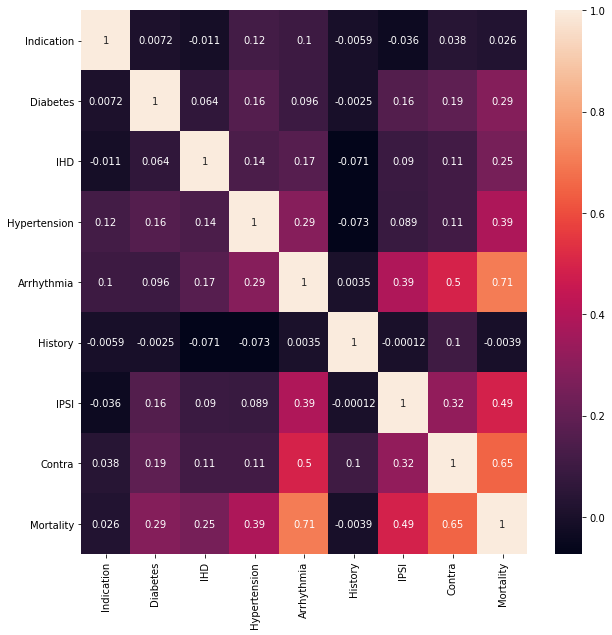

In [40]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True)
fig.savefig("heatmap.png")

## TODO : WRITE SOMETHING MEANINGFUL ABOUT THIS HEATMAP!

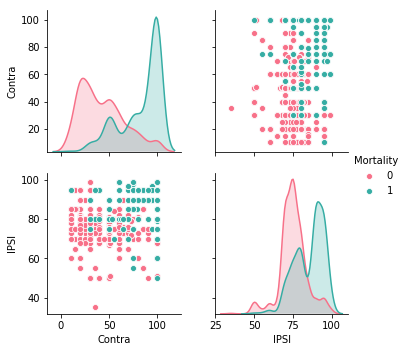

In [41]:
sns.pairplot(df_copy, vars=["Contra", "IPSI"], hue="Mortality", palette="husl")

<center> <h2> Data Modeling </h2> </center>

Splitting data into test and train dataframes

In [42]:
x = df_copy[df_copy.columns[:-1]]

In [43]:
x

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra
0,0,0,0,1,0,0,78,20
1,1,0,0,0,0,0,70,60
2,0,0,1,1,0,0,95,40
3,1,0,0,1,0,0,90,85
4,2,0,0,0,0,0,70,20
...,...,...,...,...,...,...,...,...
1515,0,0,1,0,0,0,76,60
1516,0,0,0,1,1,0,90,75
1517,1,0,0,1,0,0,75,20
1518,0,0,1,0,0,0,70,45


All but risk

In [44]:
y = df_copy["Mortality"]

In [45]:
y

0       0
1       0
2       1
3       1
4       0
       ..
1515    0
1516    1
1517    0
1518    0
1519    0
Name: Mortality, Length: 1500, dtype: int64

Just risk

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle=True)

In [47]:
print("70% of the datasize", len(x_train))
print("30% of the datasize",len(x_test))

70% of the datasize 1050
30% of the datasize 450


This is 70% of the total datasize, compared to x_test which is 30%.

In [72]:
x_train

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra
921,2,0,0,1,0,0,70,50
1445,0,0,0,0,0,0,80,90
71,3,0,0,0,0,0,95,10
1040,0,0,1,1,1,0,80,50
1371,0,0,1,1,1,0,80,50
...,...,...,...,...,...,...,...,...
194,3,0,0,0,0,0,95,15
631,0,0,0,0,0,0,90,65
595,1,0,0,0,0,0,51,51
227,2,0,1,1,1,0,75,50


If `train_test_split` is ran multiple times, random values are pulled out.

In [85]:
linear_regression = LinearRegression()

In [86]:
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
linear_regression.predict(x_test)

array([ 1.39679671e-01,  6.37346983e-02,  1.66005973e-01, -3.07660768e-02,
        5.12591889e-01, -7.23143795e-03,  4.61559116e-02,  1.02049670e-01,
        1.05731598e+00, -1.27128515e-01,  1.84564388e-01,  8.10451821e-01,
        6.63284935e-02,  8.10451821e-01, -7.27506494e-02,  3.32917038e-01,
        8.46140755e-02,  7.82102459e-02,  7.69552659e-01,  6.37346983e-02,
        7.47265094e-01, -2.00829025e-01,  9.39308417e-01,  4.42096454e-01,
        1.21638972e-01,  1.00769731e+00, -8.74736935e-02,  3.82417878e-01,
        2.54597911e-01, -1.73162874e-01,  1.99504461e-01, -7.23143795e-03,
        3.75889513e-01,  4.13723017e-01, -1.74401707e-02,  9.84410163e-01,
        3.43472466e-01, -5.53041428e-02,  2.22051197e-01, -9.03377096e-02,
        9.92041648e-01,  3.03479223e-01,  6.23212846e-01,  5.89863185e-01,
        1.25201510e-01,  8.40979350e-01,  3.10579056e-01,  2.05660794e-01,
        1.07297163e+00,  1.13443844e+00,  3.65889535e-01,  3.46907949e-01,
       -2.20649661e-01, -

In [91]:
linear_regression.score(x_test, y_test)

0.7083604037331768

In [92]:
logistic_regression = LogisticRegression()

In [98]:
logistic_regression.fit(x_train, y_train)

c:\users\kthra\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
y_pred = logistic_regression.predict(x_test)

In [102]:
logistic_regression.score(x_test, y_test)

0.9288888888888889

NOT GOOD... explain why

Decision Tree

In [73]:
decision_tree_model = tree.DecisionTreeClassifier()

In [74]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
decision_tree_model.score(x_test, y_test)

0.9866666666666667

BETTER

In [56]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, filled = True, rounded = True, special_characters=True)

In [57]:
graph = pydotplus.graph_from_dot_data(dot_data)

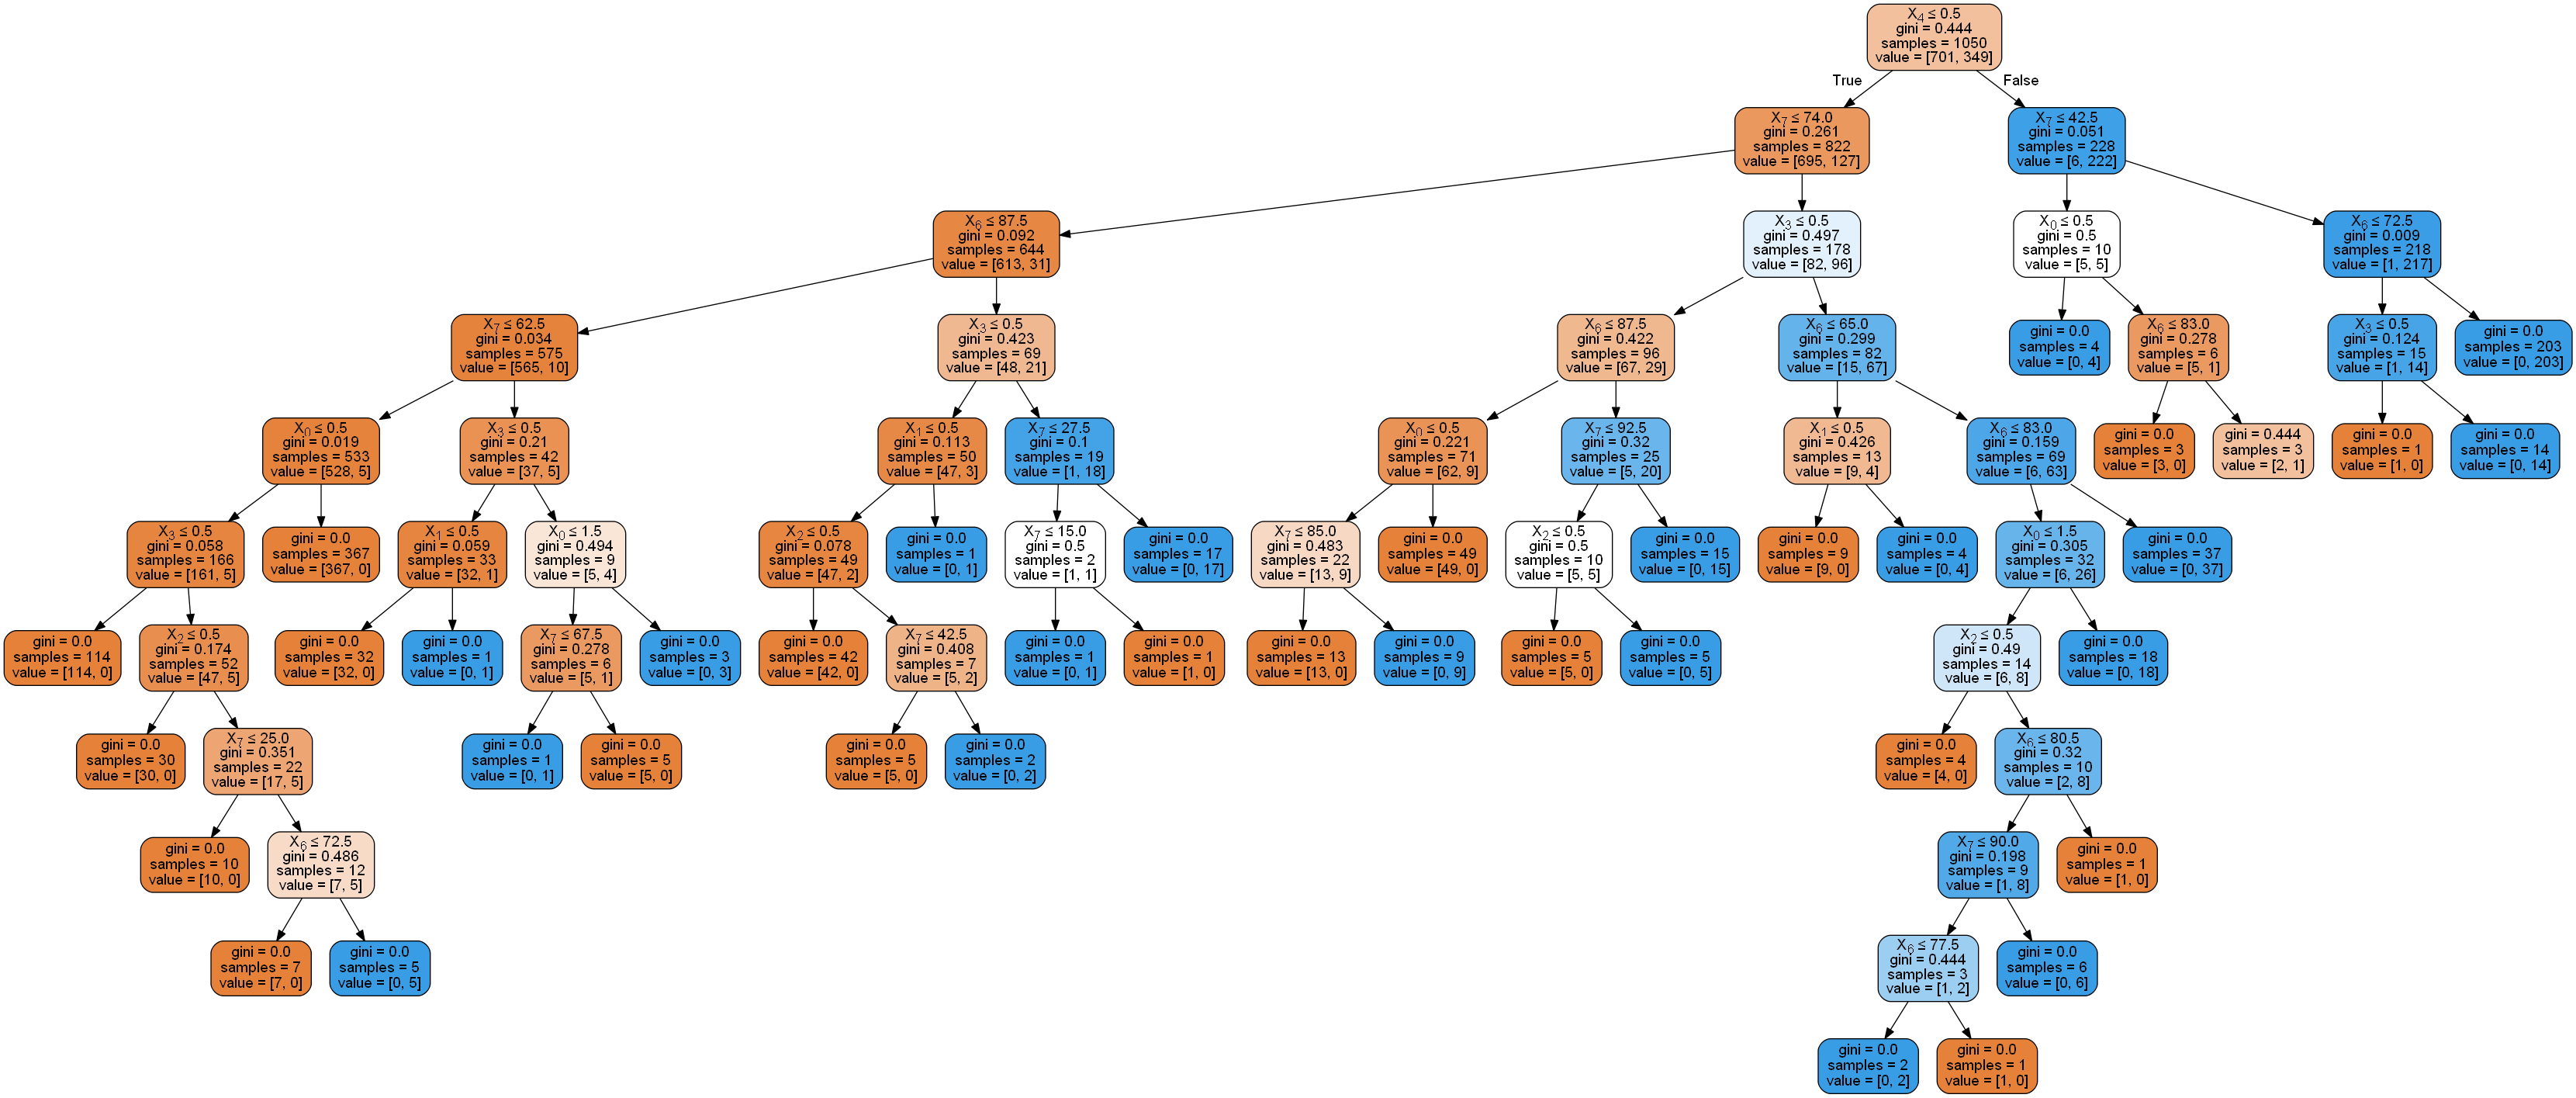

In [66]:
Image(graph.create_png())

In [77]:
graph.write_png("dtree.png")

True

array([[0.72186828, 0.72236281, 0.72847872, 0.73766654, 0.70406418],
       [0.72186828, 0.72236281, 0.72847872, 0.73766654, 0.70406418],
       [0.57311012, 0.58175749, 0.57756503, 0.58686382, 0.55774785]])